### Homework 9
### K-Means clustering

In [931]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display

Make some dummy data

In [932]:
#Create some dummy data :
n_samples = 150
random_state = 42
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=5)

### Plot the data to verify

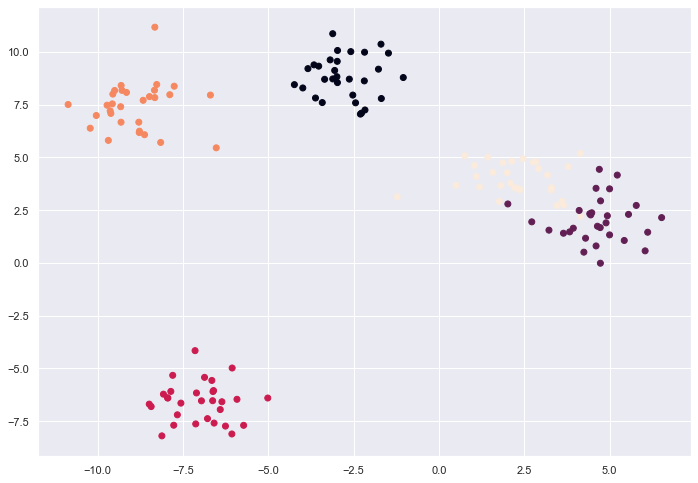

In [933]:
#Let's plot the data : 
plt.scatter(X[:, 0], X[:, 1],c=y)
plt.show()

### Write your own K-Means clustering algorithm.  Do not use sklean or any other tools.  Just python and numpy are allowed.  Use K=5 for this problem.  Your goal is to use the K-Means algorithm to compute your own clusters, then compare the results to the clusters assigned by the make_blobs function.  See if they are close by looking at the plot.  Because the cluster numbers will not line up with the original cluster numbers, all you can do is look at the plots.

### K-Means Algorithm Steps

Step-1: Select the value of K, to decide the number of clusters to be formed.

Step-2: Select random K points which will act as centroids.

Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), to the nearest/closest centroid which will form the predefined clusters.

Step-4: Compute the new centroid of each cluster.

Step-5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.

Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

Step-7: FINISH

In [934]:
# Step 1: Select value of K, to decide the number of clusters to be formed.

# There are more formal ways of choosing the K, but the assignment literaly says to use 5.
k = 4

In [935]:
# Step 2: Select random K points which will act as the center
np.random.seed(3)

# Selecting a k random clusters
centroids = X[np.random.choice(X.shape[0], k, replace=False)]
centroids = pd.DataFrame(centroids, columns=["X","Y"])

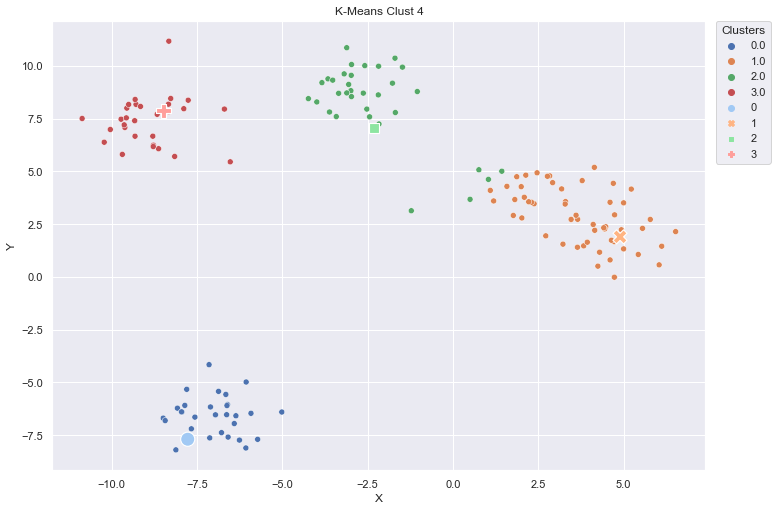

In [936]:
# Step-3: Assign each data point, based on their distance from the randomly selected points (Centroid), 
# to the nearest/closest centroid which will form the predefined clusters.
def Euclidean_D(point1, point2):
    """This Function Finds the distance between two points"""
    dist = (((point2[0]-point1[0])**2) + ((point2[1]-point1[1])**2))
    return dist

def assign_clusters(centroids, df, k):
    """This Assigns Clusters to closest centroid"""
    np.random.shuffle(df)    
    min_center_list = []
    WCSS = 0
    # # Going through each of the rows
    for row in df:
        # Creating a list of the Euclidean Distances to each centroid
        euclide_list = [Euclidean_D(row, centroids.iloc[i].values) for i in range(len(centroids))]
        
        # Talling the distance squared to add to WCSS
        WCSS += pd.Index(euclide_list).min()**2

        # Adding Min Center to the list
        min_center_list.append(euclide_list.index(pd.Index(euclide_list).min()))
        

    # Adding the clusters as third column to series
    clusters = np.column_stack((df, min_center_list))

    # Graphing the New Centroids
    sns.scatterplot(data=clusters, x=clusters[:,0], y=clusters[:,1], hue=clusters[:,2],palette='deep')
    sns.scatterplot(data=centroids, x=centroids['X'], y=centroids['Y'], style=centroids.index, hue=centroids.index, palette='pastel', s=200)
    plt.title("K-Means Clust {}".format(k))
    plt.legend(title="Clusters", bbox_to_anchor=(1.1,1), loc='upper right', borderaxespad=0)
    plt.show()
    return clusters, WCSS

clusters, WSCC = assign_clusters(centroids, X, k)    


In [937]:
# Step-4: Compute the new centroid of each cluster.

def compute_centroid(df):
    """This Functions goes through and creates new centroids"""
    # Turning Series into Panda
    df = pd.DataFrame(df, columns=["X", "Y", "Clust"])

    # Grouping by the column means, creating a new dataframe with those means for the new centroids
    new_centroid = df.groupby('Clust').X.mean().to_frame().merge(df.groupby('Clust').Y.mean().to_frame(), on='Clust', how='left')
    # display(new_centroid)    
    return new_centroid

centroids_new = compute_centroid(clusters)

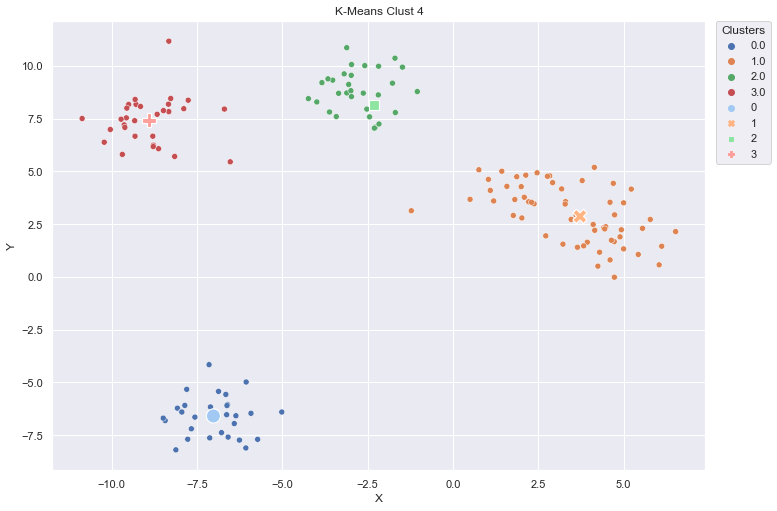

Old Centroids           X         Y
0 -7.016717 -6.593593
1  3.721711  2.868625
2 -2.297596  8.173198
3 -8.904981  7.428117
 New Centroids               X         Y
Clust                    
0.0   -7.016717 -6.593593
1.0    3.453553  2.988376
2.0   -2.764499  8.817791
3.0   -8.904981  7.428117


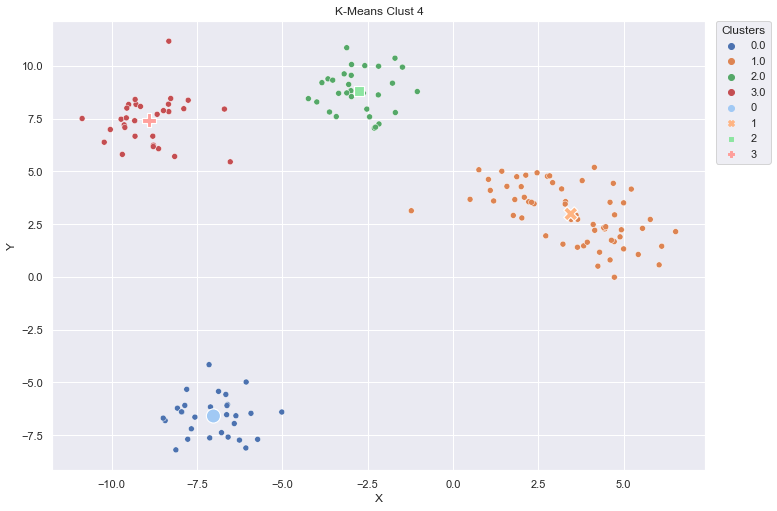

Old Centroids           X         Y
0 -7.016717 -6.593593
1  3.453553  2.988376
2 -2.764499  8.817791
3 -8.904981  7.428117
 New Centroids               X         Y
Clust                    
0.0   -7.016717 -6.593593
1.0    3.453553  2.988376
2.0   -2.764499  8.817791
3.0   -8.904981  7.428117


In [938]:

# Step-5: Repeat step no.3, which reassigns each datapoint to the new closest centroid of each cluster.
# Step-6: If any reassignment occurs, then go to step-4 else go to Step 7.

# Creating loop to go through the clusters untill the centroids stop moving
while centroids.equals(centroids_new) == False:
    centroids = centroids_new.reset_index(drop=True)
    clusters_new, WCSS = assign_clusters(centroids_new.reset_index(drop=True), X, k)
    centroids_new = compute_centroid(clusters_new)
    print("Old Centroids {}\n New Centroids {}".format(centroids, centroids_new))



# Step-7: FINISH

### Plot the cluster assignments to see if they look the same

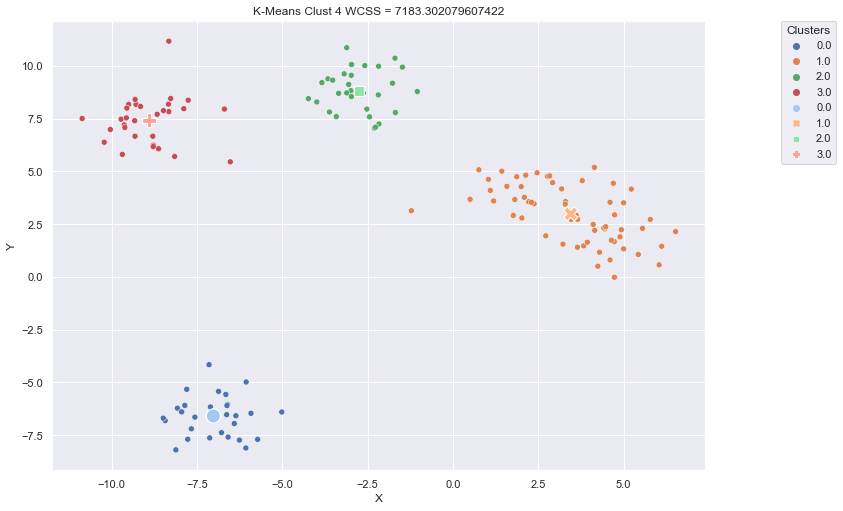

In [939]:
# This is displayed above
    
sns.scatterplot(data=clusters_new, x=clusters_new[:,0], y=clusters_new[:,1], hue=clusters_new[:,2],palette='deep')
sns.scatterplot(data=centroids_new, x=centroids_new['X'], y=centroids_new['Y'], style=centroids_new.index, hue=centroids_new.index, palette='pastel', s=200)
plt.title("K-Means Clust {} WCSS = {}".format(k, WSCC))
plt.legend(title="Clusters", bbox_to_anchor=(1.2,1), loc='upper right', borderaxespad=0)
plt.show()

### Calculate the Within Cluster Sum of Squares.  WCSS is the sum of the square of the distance between the point and its cluster center.

In [940]:
# Calculated above in the loop. 
print("WSCC:", WSCC)

WSCC: 7183.302079607422


### Run a loop from k=1 to k=10 and compute WCSS for each value of K.  Plot the WCSS values for each value of K and identify the elbow.

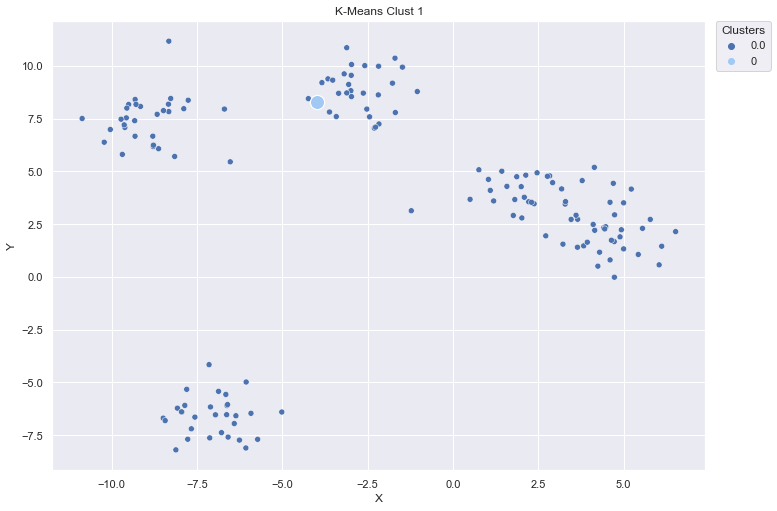

,X,Y
Clust,,
0.0,-2.355818,3.125813


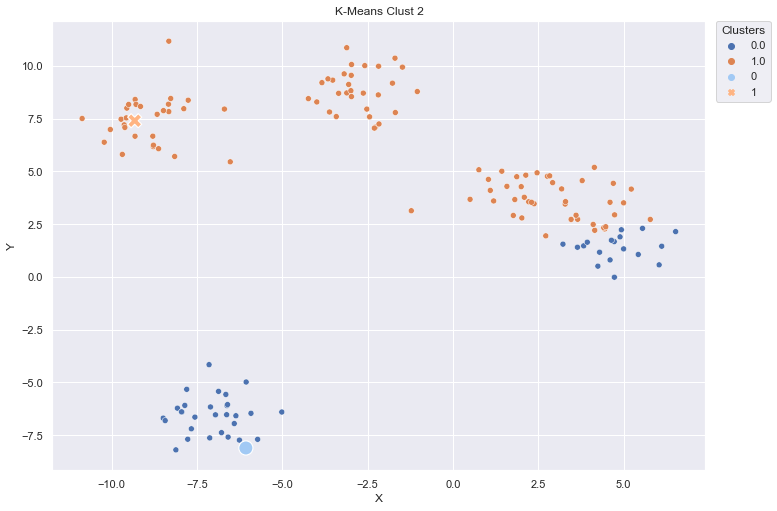

,X,Y
Clust,,
0.0,-2.585357,-3.600988
1.0,-2.247800,6.291367


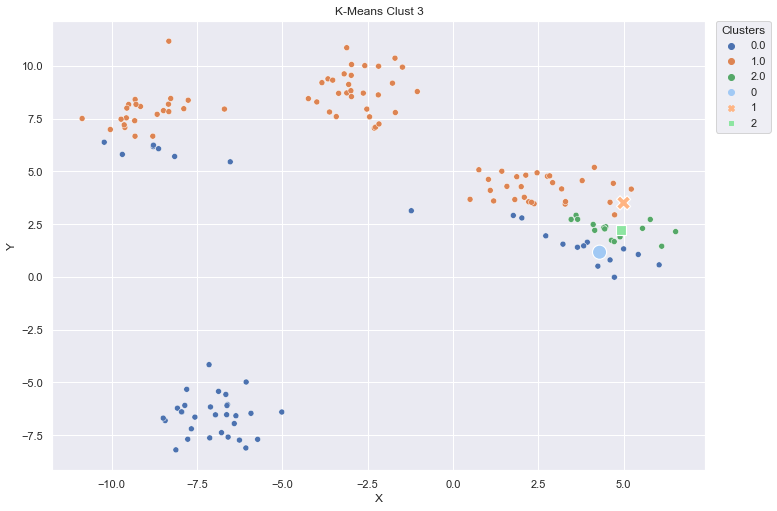

,X,Y
Clust,,
0.0,-4.172401,-2.569993
1.0,-2.584553,6.905826
2.0,4.720346,2.264620


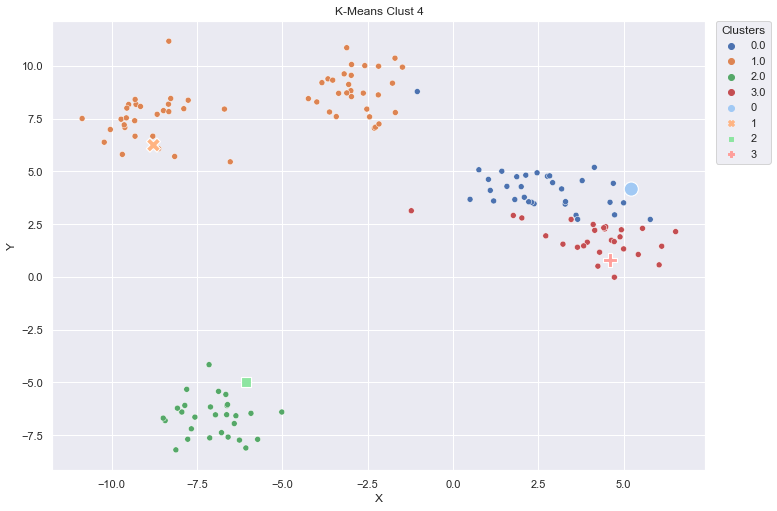

,X,Y
Clust,,
0.0,2.709028,4.179838
1.0,-5.915946,8.111673
2.0,-7.016717,-6.593593
3.0,4.170418,1.791301


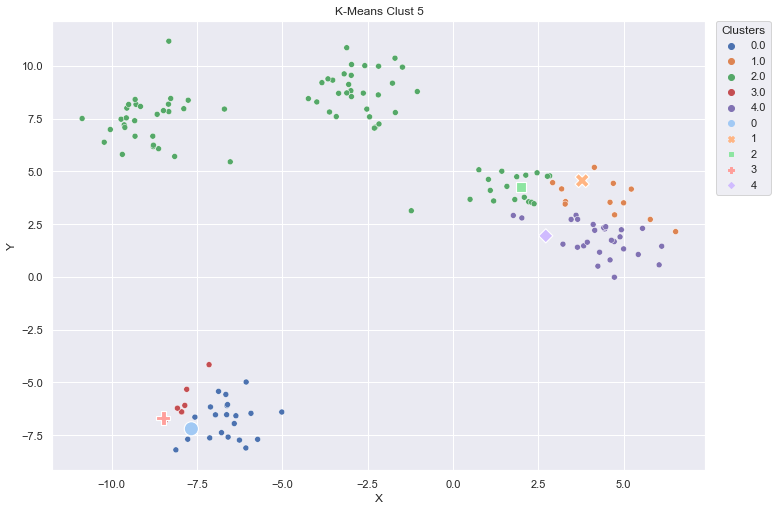

,X,Y
Clust,,
0.0,-6.673776,-6.804087
1.0,4.400511,3.760628
2.0,-4.035513,7.180570
3.0,-7.959803,-6.014734
4.0,4.240273,1.804520


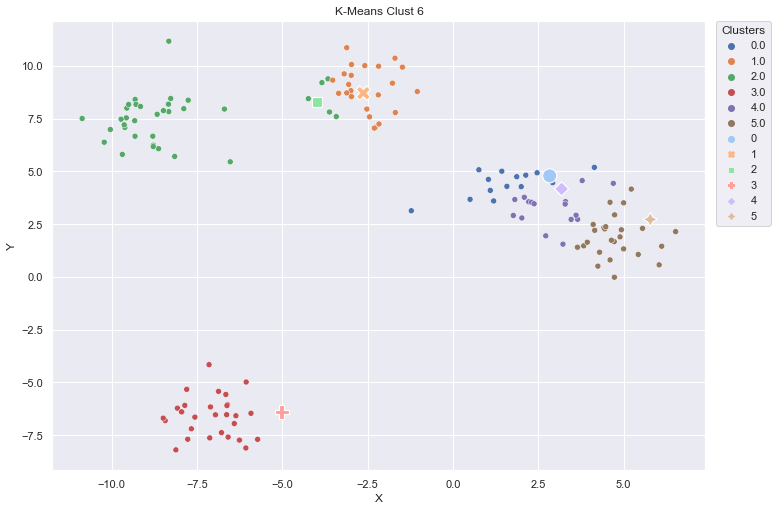

,X,Y
Clust,,
0.0,1.720938,4.471086
1.0,-2.507617,8.906920
2.0,-8.052822,7.600310
3.0,-7.016717,-6.593593
4.0,2.913814,3.282339
5.0,4.820124,1.924645


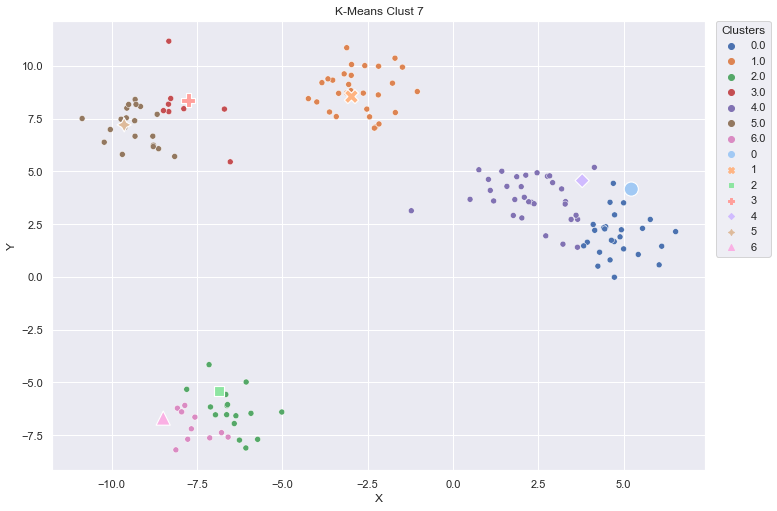

,X,Y
Clust,,
0.0,4.859041,2.036851
1.0,-2.764499,8.817791
2.0,-6.480389,-6.283625
3.0,-7.842838,8.145797
4.0,2.303608,3.766897
5.0,-9.360185,7.120540
6.0,-7.718068,-6.998936


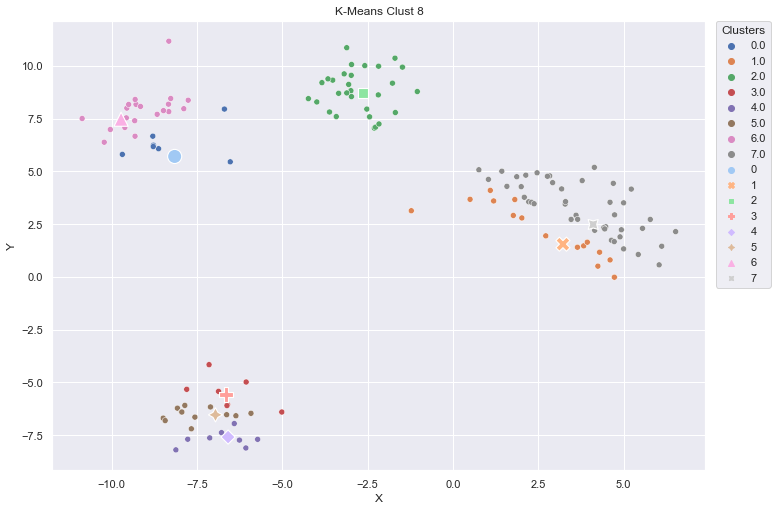

,X,Y
Clust,,
0.0,-8.253300,6.263652
1.0,2.651412,2.149268
2.0,-2.764499,8.817791
3.0,-6.594529,-5.503808
4.0,-6.758306,-7.667817
5.0,-7.455424,-6.520536
6.0,-9.141956,7.851559
7.0,3.745241,3.293507


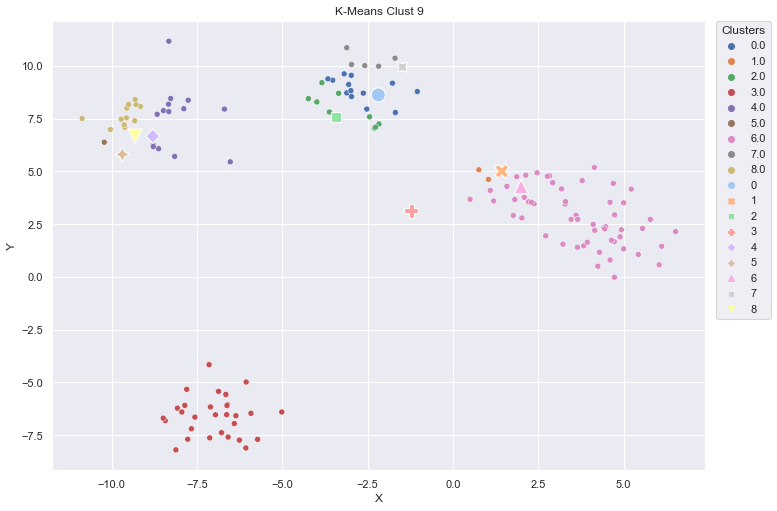

,X,Y
Clust,,
0.0,-2.664643,8.870920
1.0,1.078381,4.904641
2.0,-3.161521,7.907913
3.0,-6.829692,-6.279701
4.0,-8.158261,7.460524
5.0,-9.950559,6.097187
6.0,3.664232,2.883064
7.0,-2.335792,10.210286
8.0,-9.605722,7.595483


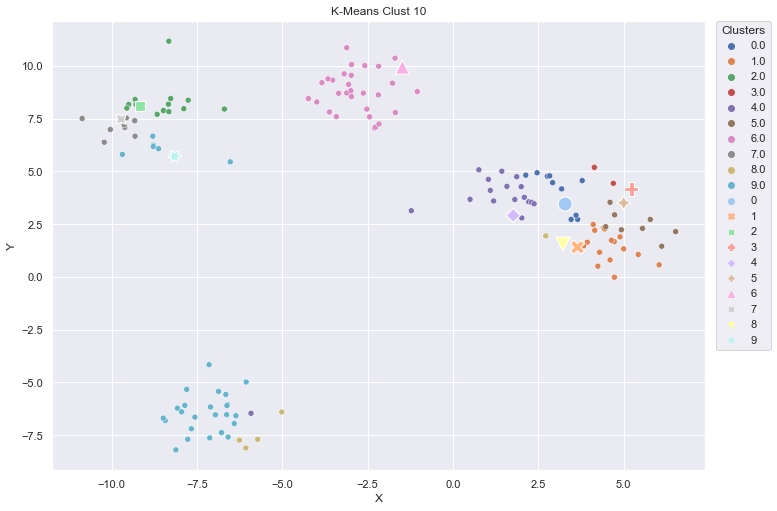

,X,Y
Clust,,
0.0,3.118133,3.994470
1.0,4.539878,1.445285
2.0,-8.537819,8.315623
3.0,4.690434,4.597985
4.0,1.052545,3.322593
5.0,5.304300,2.581328
6.0,-2.764499,8.817791
7.0,-9.809771,7.141445
8.0,-2.851556,-4.409355


In [941]:
# WSCC.dict()
np.random.seed(3)

# Looping through k=1 to k=10. Computing the WSCC score for each value of K. 
for k in range(1,11):
    # Collecting a random point fo rthe centroid
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    centroids = pd.DataFrame(centroids, columns=["X","Y"])

    clusters, WSCC = assign_clusters(centroids, X, k)
    centroids_new = compute_centroid(clusters)
    display(centroids_new)
    

    # # Looping through the algo until the centroids stablize    
    # while centroids.equals(centroids_new) == False:
    #     centroids = centroids_new.reset_index(drop=True)
    #     clusters_new, WCSS = assign_clusters(centroids_new.reset_index(drop=True), X, k)
    #     centroids_new = compute_centroid(clusters_new)
    
    # Entering in the WCSS score into the dictionary. 
    # WSCC[k] = WCSS
